In [3]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Steps in forecasting
1. Choose the model
2. Split the data into training and testing datasets
3. Fit the model on the training data
4. Test the model on the testing data
5. Evaluate the model
6. Fit the model on entire data
7. Make future forecast

In [4]:
df = pd.read_csv("C:/Users/2068671/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/airline_passengers.csv", index_col= 'Month', parse_dates= True)

In [5]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df.index.freq = "MS"

In [7]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


Train test split

In [9]:
df.shape[0]


144

In [10]:
train = df.loc[:'1958-12-01']

In [11]:
test = df.loc['1959-01-01':]

Fitting the model

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [13]:
model = ExponentialSmoothing(train["Thousands of Passengers"], trend= "mul", seasonal= "mul", seasonal_periods= 12).fit()

Testing the model on test data

In [14]:
pred = model.forecast(24).rename('HW Forecast')

In [15]:
train

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1958-08-01,505
1958-09-01,404
1958-10-01,359


In [16]:
test

,Thousands of Passengers
Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420
1959-06-01,472
1959-07-01,548
1959-08-01,559
1959-09-01,463


In [17]:
pred

1959-01-01    353.807911
1959-02-01    337.556367
1959-03-01    393.807135
1959-04-01    387.477537
1959-05-01    407.015175
1959-06-01    487.826133
1959-07-01    545.613122
1959-08-01    550.131516
1959-09-01    446.737063
1959-10-01    395.513111
1959-11-01    343.292022
1959-12-01    386.378211
1960-01-01    396.937114
1960-02-01    378.704506
1960-03-01    441.812246
1960-04-01    434.711069
1960-05-01    456.630347
1960-06-01    547.292165
1960-07-01    612.123390
1960-08-01    617.192577
1960-09-01    501.194335
1960-10-01    443.726181
1960-11-01    385.139338
1960-12-01    433.477736
Freq: MS, Name: HW Forecast, dtype: float64

Plotting the predicted and actual values

<AxesSubplot:xlabel='Month'>

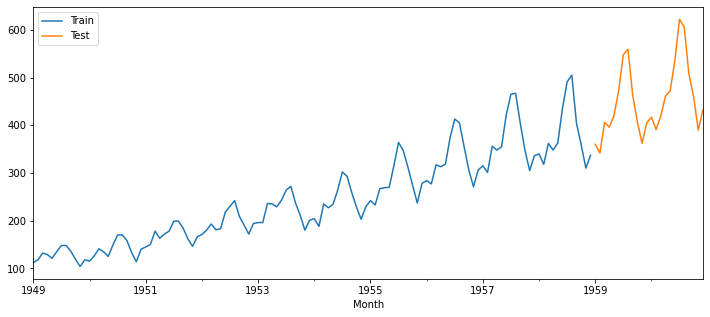

In [18]:
train["Thousands of Passengers"].plot(label = 'Train', legend = True, figsize = (12, 5))
test["Thousands of Passengers"].plot(label = 'Test', legend = True, figsize = (12, 5))

<AxesSubplot:xlabel='Month'>

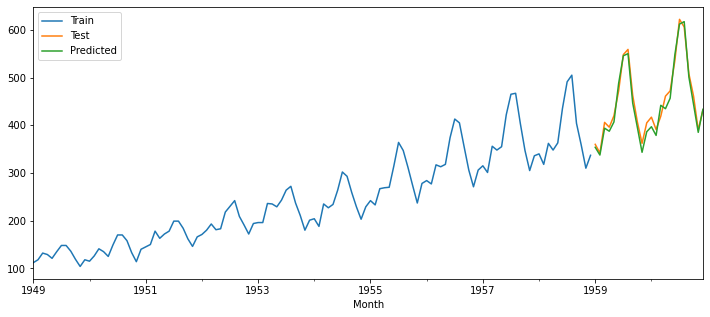

In [19]:
train["Thousands of Passengers"].plot(label = 'Train', legend = True, figsize = (12, 5))
test["Thousands of Passengers"].plot(label = 'Test', legend = True, figsize = (12, 5))
pred.plot(label = 'Predicted', legend = True, figsize = (12, 5))

Zooming for better visual comparison

<AxesSubplot:xlabel='Month'>

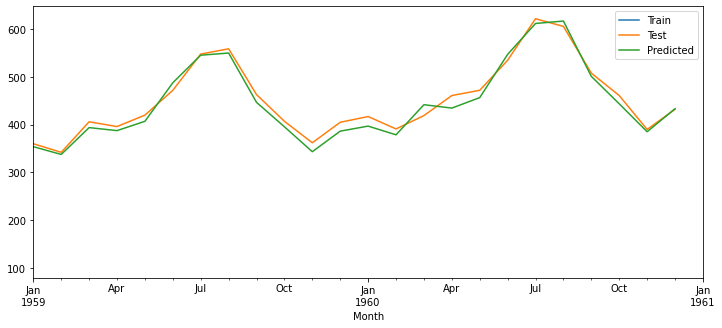

In [20]:
train["Thousands of Passengers"].plot(label = 'Train', legend = True, figsize = (12, 5))
test["Thousands of Passengers"].plot(label = 'Test', legend = True, figsize = (12, 5))
pred.plot(label = 'Predicted', legend = True, figsize = (12, 5), xlim = ['1959-01-01', '1961-01-01'])

EVALUATION METRICS FOR FORECASTING

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
mae = mean_absolute_error(test["Thousands of Passengers"], pred)
mae

12.379391964591376

In [23]:
mean_squared_error(test["Thousands of Passengers"], pred)

192.57742277726808

In [24]:
np.sqrt(mean_squared_error(test["Thousands of Passengers"], pred))

13.87722676824401

Building final model using the entire data

In [25]:
final_model = ExponentialSmoothing(df["Thousands of Passengers"], trend= "mul", seasonal= "mul", seasonal_periods= 12).fit()

In [26]:
forecast_predictions = final_model.forecast(36)

<AxesSubplot:xlabel='Month'>

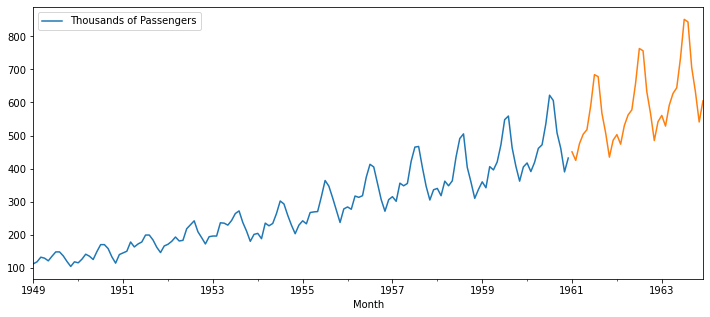

In [27]:
df[["Thousands of Passengers"]].plot(figsize = (12, 5))
forecast_predictions.plot()

Other Evaluation metrics

1. AIC - Akaike Information Criterion
The AIC evaluates a collection of models, While developing more complex arena based models with different weights the AIC is going to be able to compare those models estimating the quality of each model relative to the others.
The number of parameters are penalized in an effort to thwart overfitting. Thus more the number of parameters, more will be the penalty so that parameters having no considerable effect on the prediction accuracy will be discarded (Similar to adjusted r_2 score)

2. BIC - Bayesian approach
The BIC is similar to AIC but the mathematics is different

STATIONARITY - No trend or seasonality

In [28]:
df1 = pd.read_csv("C:/Users/2068671/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/samples.csv", parse_dates= True)

In [29]:
df1.head()

,Unnamed: 0,a,b,c,d
0,1/1/1950,36,27,0,67
1,2/1/1950,58,22,3,31
2,3/1/1950,61,17,5,67
3,4/1/1950,37,15,8,47
4,5/1/1950,66,13,8,62


Stationary data

<AxesSubplot:>

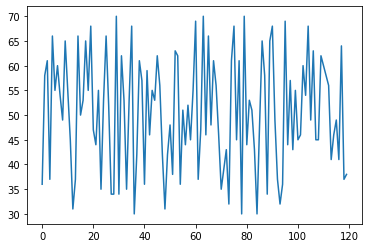

In [30]:
df1["a"].plot()

Non stationary data

<AxesSubplot:>

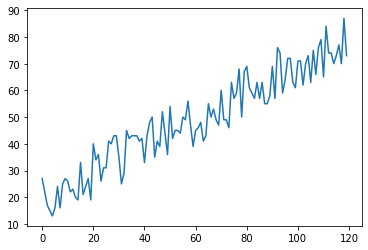

In [31]:
df1["b"].plot()

Tests for checking Stationarity

ADF TEST

NULL HYPOTHESIS: SERIES IS NOT STATIONARY

ALTERNATE HYPOTHESIS: SERIES IS STATIONARY

In [32]:
from statsmodels.tsa.stattools import adfuller

In [34]:
adfuller(df["Thousands of Passengers"])

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

Decoding adfuller o/p

In [36]:
df_test = adfuller(df["Thousands of Passengers"])
df_out = pd.Series(df_test[0:4], index = ['ADF Test Statistic', 'p-value', '# Lags used', '# Observations'])
df_out

ADF Test Statistic      0.815369
p-value                 0.991880
# Lags used            13.000000
# Observations        130.000000
dtype: float64

Since p value is much greater than 0.05;Null hypothesis is accepted, The series is not stationary 

KPSS TEST 

NULL HYPOTHESIS - DATA IS STATIONARY

ALTERNATE HYPOTHESIS - DATA IS NOT STATIONARY

In [37]:
from statsmodels.tsa.stattools import kpss

In [38]:
kpss(df["Thousands of Passengers"])

(1.0521750110135097,
 0.01,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Decoding kpss o/p

In [39]:
df_test = kpss(df["Thousands of Passengers"])
df_out = pd.Series(df_test[0:4], index = ['ADF Test Statistic', 'p-value', '# Lags used', '# Observations'])
df_out

ADF Test Statistic                                             1.052175
p-value                                                            0.01
# Lags used                                                          14
# Observations        {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%...
dtype: object

Since p value is much lesser than 0.05;Null hypothesis is rejected, The series is not stationary 

Differencing

In [ ]:
from statsmodels.tsa.statespace.tools import diff

<AxesSubplot:>

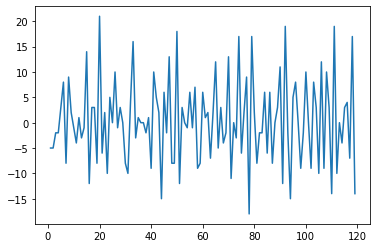

In [ ]:
diff(df1["b"], k_diff= 1).plot()

Causality - Causal Relationship between 2 timeseries

Ganger - causality test

In [41]:
df2 = pd.read_csv("C:/Users/2068671/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/samples.csv", index_col = 0)

In [42]:
df2.head()

,a,b,c,d
1/1/1950,36,27,0,67
2/1/1950,58,22,3,31
3/1/1950,61,17,5,67
4/1/1950,37,15,8,47
5/1/1950,66,13,8,62


In [43]:
df2.index.freq = "MS"

In [44]:
from statsmodels.tsa.stattools import grangercausalitytests

Identifying causal relationship between columns a and d

<AxesSubplot:>

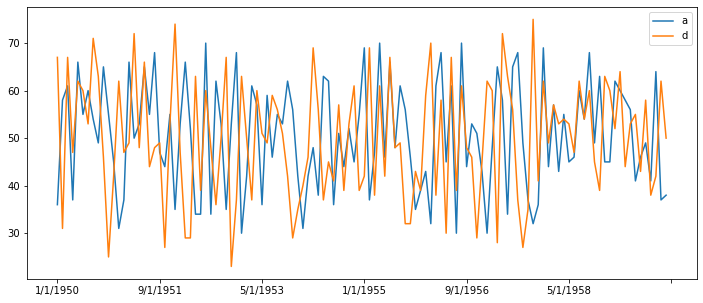

In [46]:
df2[["a", "d"]].plot(figsize = (12, 5))

Visually we couldn't find any relationship between a and d

<AxesSubplot:>

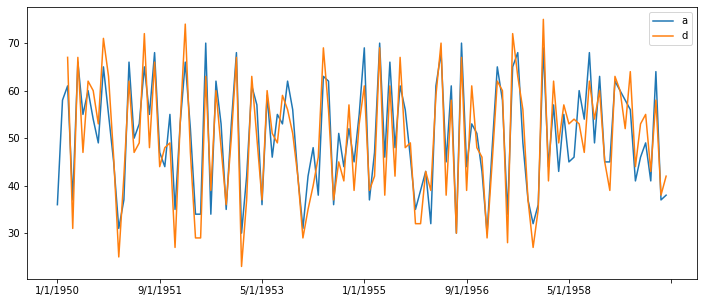

In [51]:
df2["a"].plot(figsize = (12, 5), legend = True)
df2["d"].shift(2).plot(legend = True)

Thus, after shifting column d by 2 months we see some casual relationship.              
The conclusion we infer from this is that the effect of changes in column a is observed after 2 months in column d

In [55]:
grangercausalitytests(df2[["a", "d"]], maxlag = 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


{1: ({'ssr_ftest': (1.7051251051681098, 0.1942027811635688, 116.0, 1),
   'ssr_chi2test': (1.7492231682328023, 0.18597442074424264, 1),
   'lrtest': (1.7364915553187075, 0.18758398456227507, 1),
   'params_ftest': (1.7051251051681153, 0.1942027811635669, 116.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (286.03394262556094, 6.025362015680875e-45, 113.0, 2),
   'ssr_chi2test': (597.3806235365697, 1.9074176679053317e-130, 2),
   'lrtest': (212.65135382912, 6.65802208467127e-47, 2),
   'params_ftest': (286.03394262555724, 6.025362015684541e-45, 113.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (188.74462328616224, 3.2288482941468905e-43, 110.0, 3),
   'ssr_chi2test': (602.2669343040268, 3.2505045874690406e-130, 3),
   'lrtest': (212.4788575746153, 8.48066571559607e-46, 3),
   'params_ftest': (188.7446232861622, 3.2288482941469207e-43, 110.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],


We check for extremely low p values which is observed in lag 2. The cut off value is 0.05 to confirm any sort of causality

Plotting monthly, quarterly, early plots

In [56]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

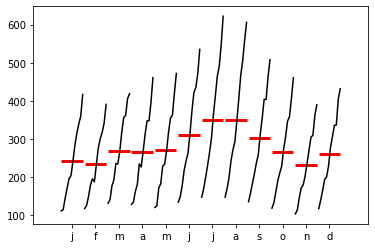

In [58]:
month_plot(df["Thousands of Passengers"]);

In [67]:
dfq = df["Thousands of Passengers"].resample(rule = "Q").mean()

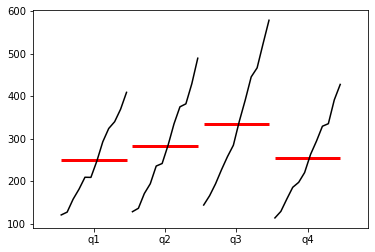

In [68]:
quarter_plot(dfq);